## ROAD LANE LINE DETECTION USING OPENCV PROJECT

In [7]:
# Importing necessary libraries

import cv2
import matplotlib.pyplot as plt
import numpy as np

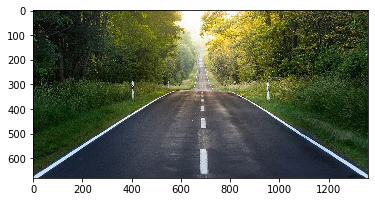

In [8]:
# Reading an image of road.
image = cv2.imread(r"..\input\road4.jpg", 1)

# Converting to RGB format.
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# Displaying the image using pyplot.
plt.imshow(image)
plt.show()


# OUTPUT: 
# X axis scale starts from 0 to 600.
# Y axis scale starts from 400  to 0.

# This scale will help us to decide the region of interest.

In [9]:
# Shape of the image -> (height,width)

print(image.shape)
height = image.shape[0]
width = image.shape[1]


(680, 1360, 3)


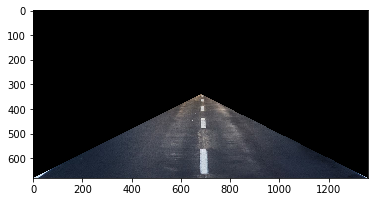

In [10]:
# Region of interest

region_interest_vertices = [
    (0, height),
    (width/2, height/2),
    (width, height) ]

# Now we need to mask everything in the image other than the region of interest.

def region_of_interest(img, vertices):

    # A black image exactly similar to the road image is built.
    mask = np.zeros_like(img)
    
    # Retrieve the number of color channels from the image.
    channel_count = img.shape[2]
    
    # A match color mask is created with the same color channel count.
    match_mask_color = (255,) * channel_count
    
    # Fill the polygon.
    cv2.fillPoly(mask, vertices, match_mask_color)
    
    # Return the image only where the mask pixel matches.
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

# Masking the road except the region of interest.
cropped_image = region_of_interest(image,np.array([region_interest_vertices], np.int32))

plt.imshow(cropped_image)
plt.show()

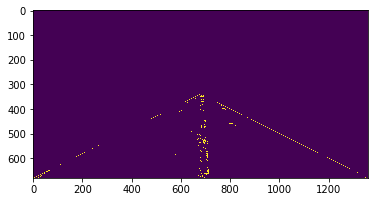

In [11]:
# Now we need to find out the edges in the image.
# For that we need a grayscale image and then apply Canny Edge Detection technique.


gray_img = cv2.cvtColor(cropped_image, cv2.COLOR_RGB2GRAY)

canny_img = cv2.Canny(gray_img, 100,200)

plt.imshow(canny_img)
plt.show()


# OUTPUT:   Edges are detected even for the region of interest boundaries which is not required.
# We are concerned with only the road.

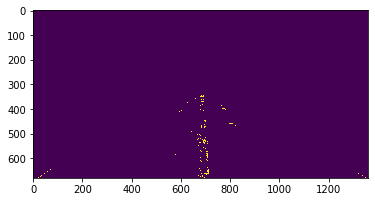

In [12]:
# So the solution of above issue is:
# Before applying the region of interest, we need to find the edges and then apply Region of interest.

# Also, we have converted our image to grayscale. Now the channels is only 1.
# Comment out the channels.

region_interest_vertices = [
    (0, height),
    (width/2, height/2),
    (width, height) ]

# Now we need to mask everything in the image other than the region of interest.

def region_of_interest(img, vertices):

    # A black image exactly similar to the road image is built.
    mask = np.zeros_like(img)
    
    # Retrieve the number of color channels from the image.
    #channel_count = img.shape[2]
    
    # A match color mask is created with the same color channel count.
    #match_mask_color = (255,) * channel_count
    
    match_mask_color = (255,) * 1
    
    # Fill the polygon.
    cv2.fillPoly(mask, vertices, match_mask_color)
    
    # Return the image only where the mask pixel matches.
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


gray_img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
canny_img = cv2.Canny(gray_img, 100,200)

cropped_image = region_of_interest(canny_img,np.array([region_interest_vertices], np.int32))

plt.imshow(cropped_image)
plt.show()

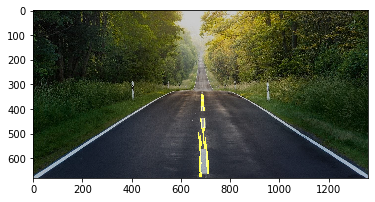

In [13]:
# Now we will draw lines on the edges using the Probabilistic Hough Lines Transform.

lines = cv2.HoughLinesP(cropped_image,rho=6,theta=np.pi/180,threshold=160,lines=np.array([]),minLineLength=40,maxLineGap=25)

# A function to draw the lines on the image.
def draw_the_lines(img, lines):
    img = np.copy(img)
    blank_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

    for line in lines:
        for x1, y1, x2, y2 in line:
            # Draw line on blank image
            cv2.line(blank_image, (x1,y1), (x2,y2), (255, 255, 0), thickness=3)

    # Merge the blank image and the original image.
    img = cv2.addWeighted(img, 0.8, blank_image, 1, 0.0)

    return img

image_with_lines = draw_the_lines(image, lines)
plt.imshow(image_with_lines)
plt.show()
